In [1]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pydtmc

import pdb
# warnings.filterwarnings('ignore')

In [2]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024September')

In [3]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

In [4]:
# ----- TRANSITION MATRIX FUNCTION -----
def calculate_transition_matrix(data,normaxis):
    
    # use data to extract transitions
    data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
    transitions = data.groupby(['behavior', 'next_behav']) # organize by unique behavior transitions
    counts = {i[0]:len(i[1]) for i in transitions} # count up instances of transitions
    
    # generate behavior x behavior matrix
    behavs = sorted(data.behavior.unique())
    matrix = pd.DataFrame()

    for x in behavs: # count up transition numbers
        matrix[x] = pd.Series([counts.get((x,y), 0) for y in behavs], index=behavs)        
        
    cols = matrix.columns
    
    # calculate probabilities across row
    matrix[cols] = matrix[cols].div(matrix[cols].sum(axis=normaxis), axis=normaxis)
    
    return matrix

def filter_data_and_calculate_transitions(data,assay,sex,gt,normaxis):
    
    adf = data[data.assay==assay]
    filt = adf[np.logical_and(adf.sex==sex,adf.GT==gt)]
       
    tmatrix = calculate_transition_matrix(filt,normaxis)
    
    return tmatrix

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


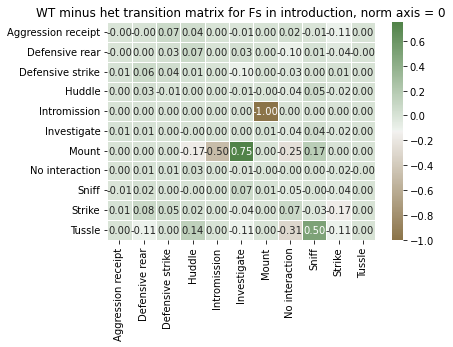

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


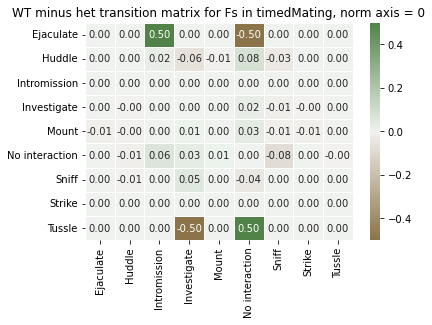

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


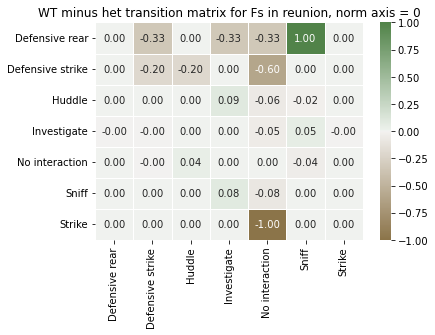

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


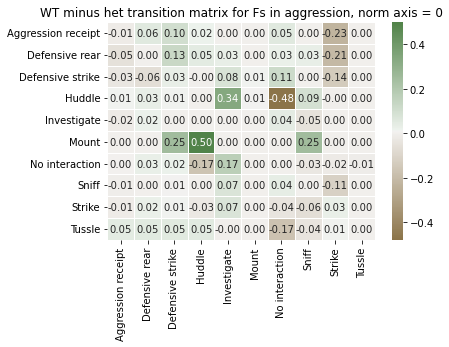

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


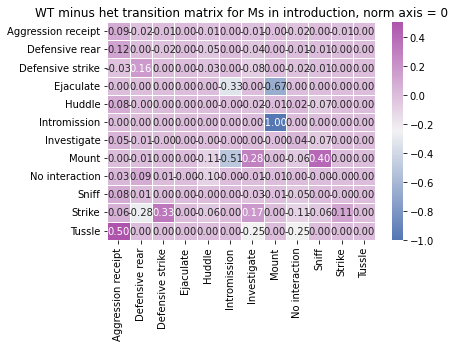

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


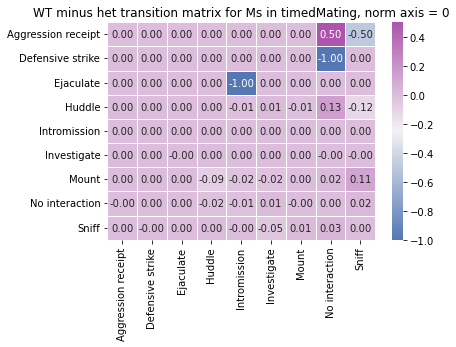

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


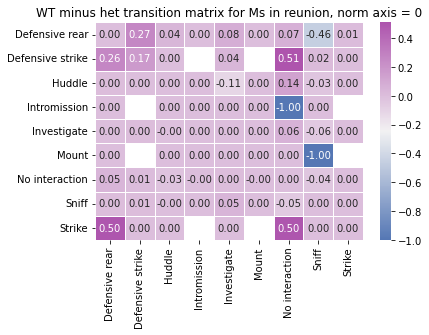

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


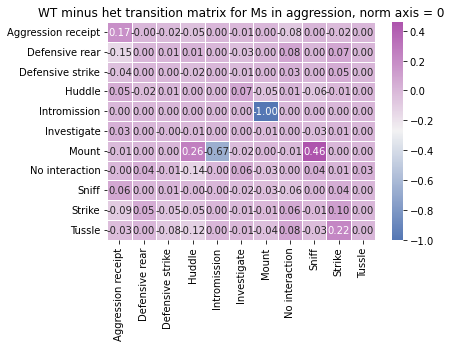

In [13]:
# ----- MAKE TRANSITION MATRICES FOR ALL ASSAYS AND GROUPS AND SUBTRACT HET FROM WT -----

assays = ['introduction','timedMating','reunion','aggression']
sexes = ['F','M']
genotypes = ['WT','Het']
normaxis = 0
saveplots = True

diffcols = [60,124,253,308]
        
cc = 0        
        
for i, sex in enumerate(sexes):
    for assay in assays:
        upal = sns.diverging_palette(diffcols[cc], diffcols[cc+1], s=60, as_cmap=True)
        wt = filter_data_and_calculate_transitions(data,assay,sex,'WT',normaxis)
        het = filter_data_and_calculate_transitions(data,assay,sex,'Het',normaxis)
        diff = wt.subtract(het, fill_value=0)
        fig = plt.figure()
        hmap = sns.heatmap(diff,cmap=upal,annot=True,linewidth=.5,fmt=".2f")
        ttl = f'WT minus het transition matrix for {sex}s in {assay}, norm axis = {normaxis}'
        hmap.set(title=ttl)
        fname = f'transitionProbs_{assay}_{sex}_WT-het_normaxis{normaxis}.png'
        plt.show()
        if saveplots:
            fig.savefig(os.path.join(outp,fname))

    cc+=2

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


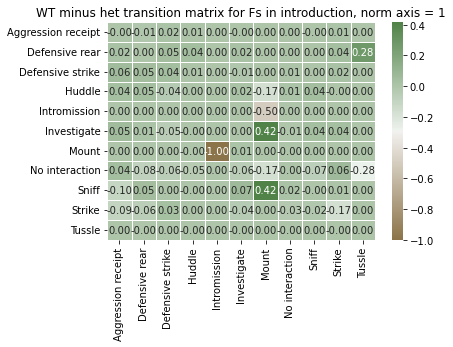

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


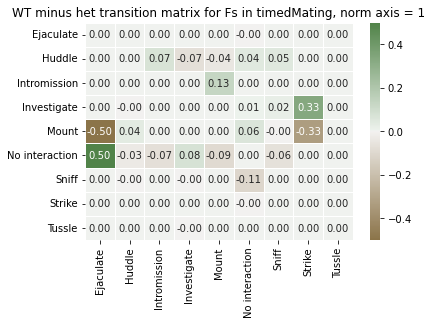

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


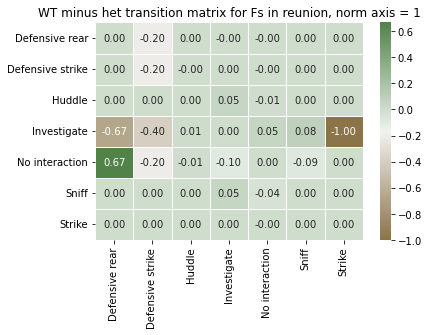

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


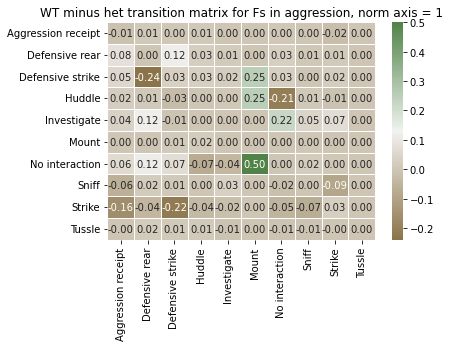

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


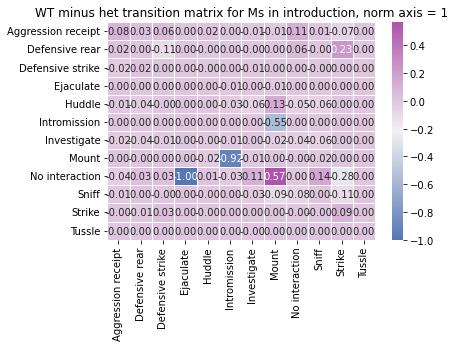

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


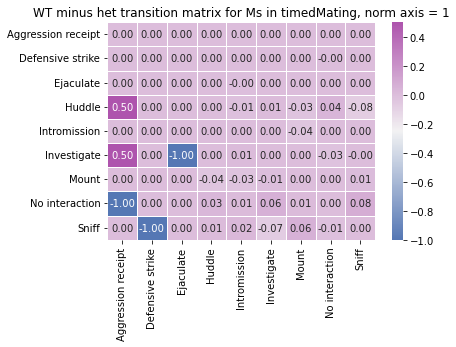

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


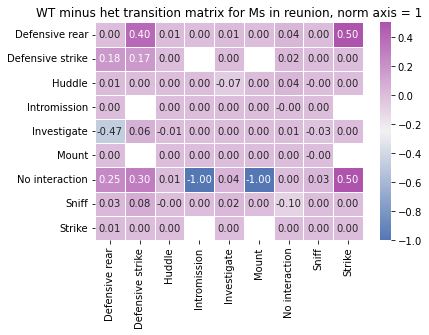

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


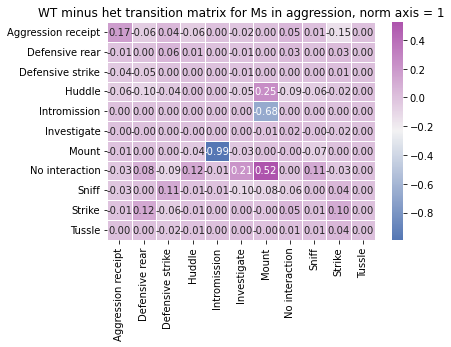

In [14]:
# ----- MAKE TRANSITION MATRICES FOR ALL ASSAYS AND GROUPS AND SUBTRACT HET FROM WT -----

assays = ['introduction','timedMating','reunion','aggression']
sexes = ['F','M']
genotypes = ['WT','Het']
normaxis = 1
saveplots = True

diffcols = [60,124,253,308]
        
cc = 0        
        
for i, sex in enumerate(sexes):
    for assay in assays:
        upal = sns.diverging_palette(diffcols[cc], diffcols[cc+1], s=60, as_cmap=True)
        wt = filter_data_and_calculate_transitions(data,assay,sex,'WT',normaxis)
        het = filter_data_and_calculate_transitions(data,assay,sex,'Het',normaxis)
        diff = wt.subtract(het, fill_value=0)
        fig = plt.figure()
        hmap = sns.heatmap(diff,cmap=upal,annot=True,linewidth=.5,fmt=".2f")
        ttl = f'WT minus het transition matrix for {sex}s in {assay}, norm axis = {normaxis}'
        hmap.set(title=ttl)
        fname = f'transitionProbs_{assay}_{sex}_WT-het_normaxis{normaxis}.png'
        plt.show()
        if saveplots:
            fig.savefig(os.path.join(outp,fname))

    cc+=2

In [11]:
# why do the male reunion plots have NaN fill instead of 0 fill?

sex = 'M'
assay = 'reunion'

wt = filter_data_and_calculate_transitions(data,assay,sex,'WT',normaxis)
het = filter_data_and_calculate_transitions(data,assay,sex,'Het',normaxis)
diff = wt.subtract(het, fill_value=0)

C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior
C:\Users\Nerissa\AppData\Local\Temp\ipykernel_5788\2333000662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_behav'] = data.groupby('pair_tag').behavior.shift(periods=-1) # generate match of behavior to next behavior


In [12]:
diff

,Defensive rear,Defensive strike,Huddle,Intromission,Investigate,Mount,No interaction,Sniff,Strike
Defensive rear,0.000000,0.265823,0.037975,0.000000,0.075949,0.000000,0.069620,-0.462025,0.012658
Defensive strike,0.264151,0.169811,0.000000,NaN,0.037736,NaN,0.509434,0.018868,0.000000
Huddle,0.002500,0.000000,0.000000,0.000000,-0.110705,0.000000,0.137500,-0.032115,0.000000
Intromission,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,NaN
Investigate,0.002048,0.004566,-0.004980,0.000000,0.000000,0.000000,0.056024,-0.056136,0.000000
Mount,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,NaN
No interaction,0.047869,0.013136,-0.026225,-0.000571,0.004181,-0.001142,0.000000,-0.037609,0.000821
Sniff,0.003053,0.006107,-0.001803,0.000000,0.047515,0.000000,-0.054872,0.000000,0.000000
Strike,0.500000,0.000000,0.000000,NaN,0.000000,NaN,0.500000,0.000000,0.000000
